# Project

## Author: Harsh Parmar

**Dataset Source: Suraj, (2023) . _Car Sales Data_ . Kaggle . https://www.kaggle.com/datasets/suraj520/car-sales-data**

**Modified Dataset: _Car Sales Data_ . https://media.githubusercontent.com/media/ParmarHarsh/Project-Group-50/main/car_sales_data.csv**

# Car Sales Data

**Attributes for car-sales-data.csv dataset:**

The below attributes are copied from the original dataset.
1. Date: The date of the car sale
2. Salesperson: The name of the salesperson who made the sale
3. Customer Name: The name of the customer who purchased the car
4. Car Make: The make of the car that was purchased
5. Car Model: The model of the car that was purchased
6. Car Year: The year of the car that was purchased
7. Sale Price: The sale price of the car in USD
8. Commission Rate: The commission rate paid to the salesperson on the sale
9. Commission Earned: The amount of commission earned by the salesperson on the sale

## 1 - Look at the big picture & frame the problem.

### Look at the big picture

- Predicting future car sales aids manufacturers in planning production, managing inventory, and optimizing marketing strategies based on historical sales data.

### Frame the problem

- Supervised learning: Using labeled historical data to predict sales figures constitutes a supervised learning problem.
- A regression task: Forecasting sales figures from available attributes aligns with regression.
- Batch learning: Leveraging the entire dataset to train models for predicting future sales represents batch learning.

## 2 - Load the dataset.

In [1]:
# Import libraries.
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset.
url = "https://media.githubusercontent.com/media/ParmarHarsh/Project-Group-50/main/car_sales_data.csv"
cars = pd.read_csv(url, sep=',')

# Create a backup copy of the dataset.
cars_backup = cars

### 2.1 - Take a quick look at the data structure.

In [2]:
# Content of dataset.
cars

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85
...,...,...,...,...,...,...,...,...,...
2499995,2022-05-26,Isabella Moore,Shirley Lee,Chevrolet,Silverado,2021,49823,0.062977,3137.70
2499996,2022-10-03,Kimberly Snow,Tara Rodgers,Ford,F-150,2022,18803,0.068339,1284.97
2499997,2022-06-07,Jessica Young,Jennifer Moore,Chevrolet,Civic,2010,30863,0.088915,2744.19
2499998,2023-02-15,Donald Barber,Ashley Diaz,Honda,Silverado,2014,26125,0.088260,2305.80


In [3]:
# First few rows of dataset.
cars.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [4]:
# Descriptive statistics of numerical columns.
cars.describe()

,Car Year,Sale Price,Commission Rate,Commission Earned
count,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,2.015996e+03,3.001218e+04,9.998766e-02,3.001005e+03
std,3.739132e+00,1.154514e+04,2.887202e-02,1.481467e+03
min,2.010000e+03,1.000000e+04,5.000014e-02,5.013400e+02
25%,2.013000e+03,2.001900e+04,7.496450e-02,1.821710e+03
50%,2.016000e+03,3.000600e+04,1.000058e-01,2.741910e+03
75%,2.019000e+03,4.002200e+04,1.250065e-01,3.978142e+03
max,2.022000e+03,5.000000e+04,1.500000e-01,7.494530e+03


In [5]:
# Consize summary of dataset.
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   Salesperson        object 
 2   Customer Name      object 
 3   Car Make           object 
 4   Car Model          object 
 5   Car Year           int64  
 6   Sale Price         int64  
 7   Commission Rate    float64
 8   Commission Earned  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 171.7+ MB


In [6]:
# Dimensions of dataset.
cars.shape

(2500000, 9)

## 3 - Explore and visualize the data to gain insights.

### 3.1 - Plot a histogram of the data.

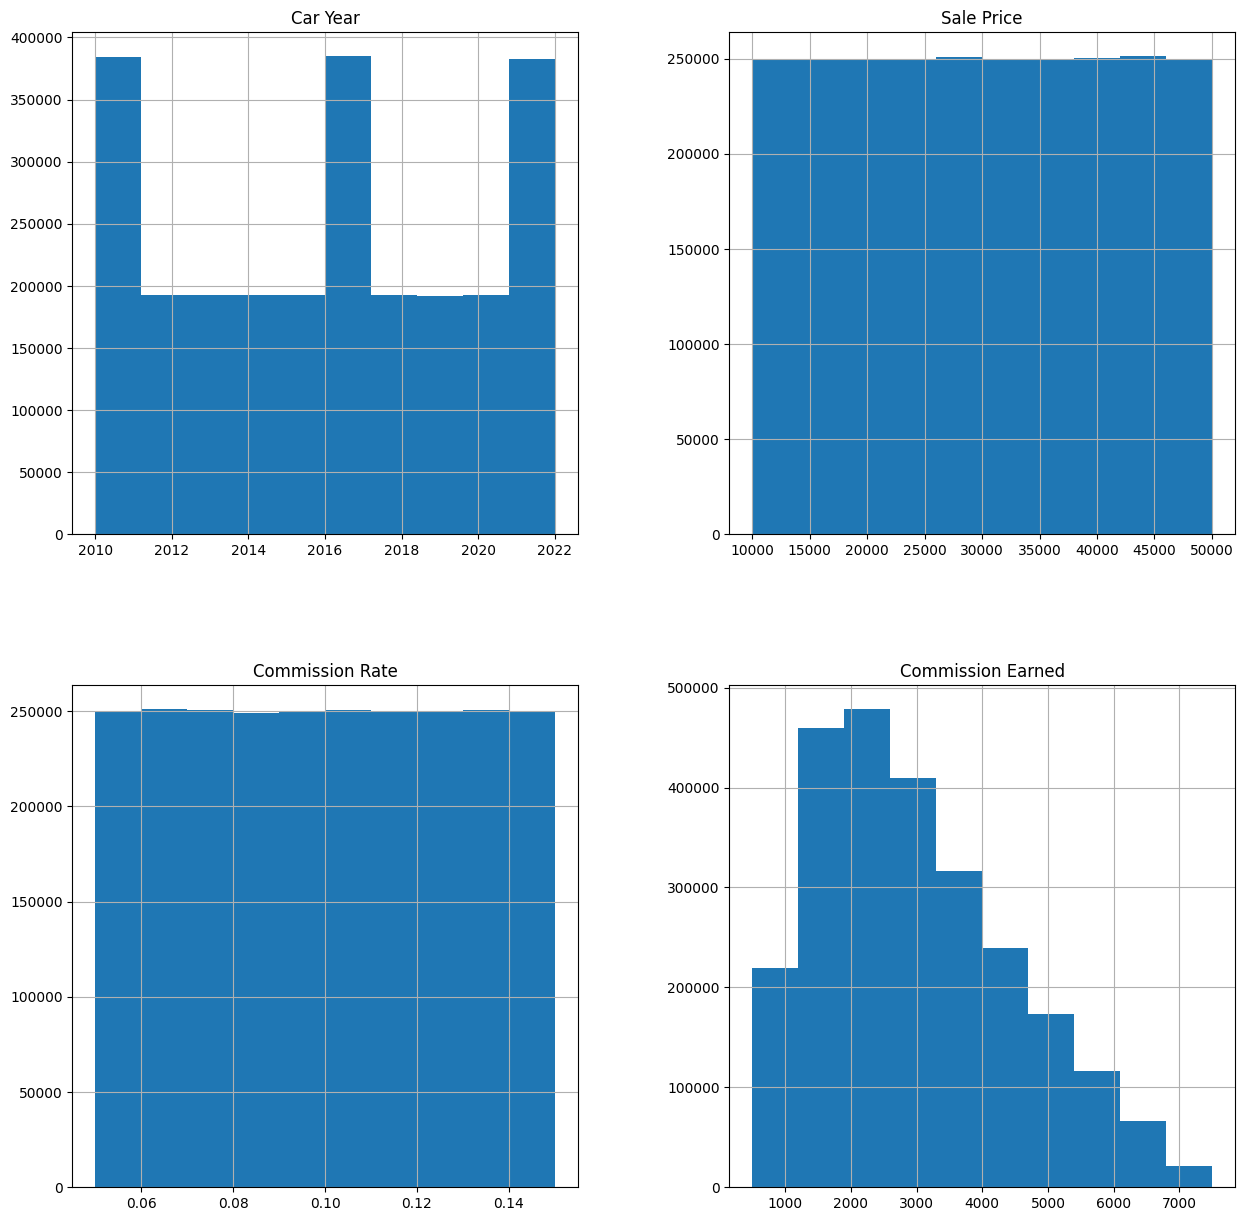

In [7]:
# Displaying a histogram
cars.hist(figsize=(15,15))
plt.show()

### 3.2 - Look for correlations between the features.

#### 3.2.1 - Correlations using Pearson correlation coefficient.

In [8]:
# Calculating the correlation matrix.
corr_matrix = cars.corr(numeric_only=True)

# # Sorting the correlation of 'Sale Price'.
corr_matrix["Sale Price"].sort_values(ascending=False)

Sale Price           1.000000
Commission Earned    0.779319
Commission Rate      0.000474
Car Year            -0.000667
Name: Sale Price, dtype: float64

#### 3.2.2 - Correlations with regard to our target.

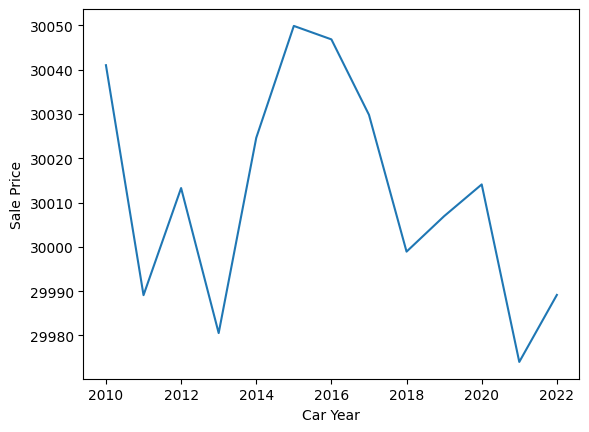

In [9]:
# Line plot to visualize the relationship between 'Car Year' and 'Sale Price'.
year_vs_price = sns.lineplot(x="Car Year", y="Sale Price", data=cars, errorbar=None)

### 3.3 - Look at the structure of Car Make and Car Model

In [10]:
# Counting the occurrences of each car make in the 'Car Make' column.
count_make = cars["Car Make"].value_counts()
count_make

Car Make
Honda        500687
Chevrolet    500455
Toyota       500147
Ford         499781
Nissan       498930
Name: count, dtype: int64

In [11]:
# Counting the occurrences of each car model in the 'Car Model' column.
count_model = cars["Car Model"].value_counts()
count_model

Car Model
Silverado    500842
Civic        500498
Corolla      500162
F-150        499679
Altima       498819
Name: count, dtype: int64

Car Make
Honda        30032.532548
Nissan       30016.451923
Chevrolet    30015.431557
Toyota       30001.989895
Ford         29994.461240
Name: Sale Price, dtype: float64


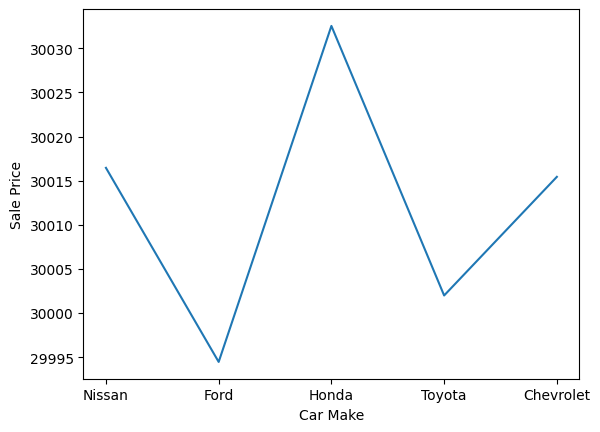

In [12]:
# Creating a line plot to visualize the relationship between 'Car Make' and 'Sale Price'.
make_vs_price = sns.lineplot(x="Car Make", y="Sale Price", data=cars, errorbar=None)

# Calculating the average sale price for each car make and sorting in descending order.
average_price_by_make = cars.groupby('Car Make')['Sale Price'].mean().sort_values(ascending=False)
print(average_price_by_make)

Car Model
Silverado    30030.179052
Corolla      30023.817657
Altima       30022.035803
F-150        29995.522253
Civic        29989.340197
Name: Sale Price, dtype: float64


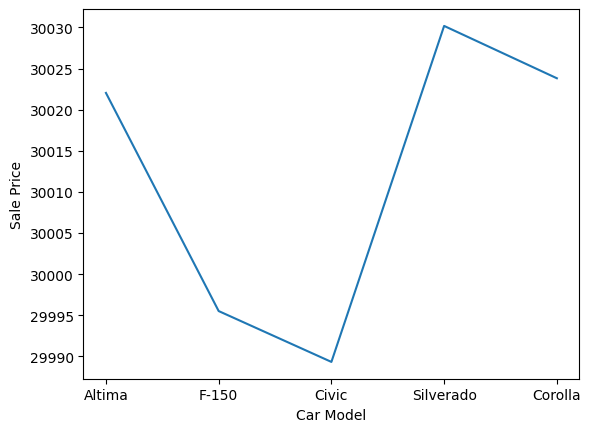

In [13]:
# Creating a line plot to visualize the relationship between 'Car Model' and 'Sale Price'.
model_vs_price = sns.lineplot(x="Car Model", y="Sale Price", data=cars, errorbar=None)

# Calculating the average sale price for each car model and sorting in descending order
average_price_by_model = cars.groupby('Car Model')['Sale Price'].mean().sort_values(ascending=False)
print(average_price_by_model)

## 4 - Preprocessing.

In [14]:
# Selecting every 500th row in the dataset.
cars = cars.iloc[::500]

cars.shape

(5000, 9)

### 4.1 - Check for duplicate rows and remove them if any.

In [15]:
# Checking for and counting duplicated rows.
cars.duplicated().sum()

0

### 4.2 - Handle the missing values.

In [16]:
# Replacing '?' with NaN (missing value).
cars = cars.replace('?', np.nan)

# Counting missing values (NaN) in each column.
cars.isna().sum()

Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64

### 4.3 - Create a pipeline.

In [17]:
# Creating features (X) by dropping the "Sale Price" column.
X = cars.drop(["Sale Price"], axis = 1)

# Creating the target variable (y) using the "Sale Price" column.
y = cars["Sale Price"]

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Separating numeric and categorical columns.
num_cols = X.select_dtypes(include='number').columns.to_list()
cat_cols = X.select_dtypes(exclude='number').columns.to_list()

# Creating pipelines for numeric and categorical data.
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

# Combining numeric and categorical preprocessing pipelines using ColumnTransformer.
preprocessing = ColumnTransformer([('num', num_pipeline, num_cols), ('cat', cat_pipeline, cat_cols)]
                                  , remainder='passthrough')

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Car Year', 'Commission Rate',
                                  'Commission Earned']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Date', 'Salesperson', 'Customer Name',
                                  'Car Make', 'Car Model'])])

In [19]:
import scipy

# Performing preprocessing on the features (X).
X_prep = preprocessing.fit_transform(X)

# Checking if the resulting transformed data is a sparse matrix and converting it to a dense array.
if isinstance(X_prep, scipy.sparse.csr_matrix):
    X_prep = X_prep.toarray()

# Getting feature names after transformation.
feature_names = preprocessing.get_feature_names_out()

# Creating a DataFrame using the transformed data and the obtained feature names.
X_prep = pd.DataFrame(data=X_prep, columns=feature_names)

X_prep

,num__Car Year,num__Commission Rate,num__Commission Earned,cat__Date_2022-05-01,cat__Date_2022-05-02,cat__Date_2022-05-03,cat__Date_2022-05-04,cat__Date_2022-05-05,cat__Date_2022-05-06,cat__Date_2022-05-07,...,cat__Car Make_Chevrolet,cat__Car Make_Ford,cat__Car Make_Honda,cat__Car Make_Nissan,cat__Car Make_Toyota,cat__Car Model_Altima,cat__Car Model_Civic,cat__Car Model_Corolla,cat__Car Model_F-150,cat__Car Model_Silverado
0,0.536470,-1.030884,-1.275176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.335423,-0.641824,-1.214949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.270153,1.527946,1.575317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.270153,-1.187249,-1.015135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.536470,0.937382,0.522159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.802788,-0.192810,-0.156147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4996,-0.262483,0.711553,-0.159530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4997,0.536470,0.805419,-0.172564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4998,0.003835,-0.240821,-1.212431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## 5 - Modelling.

### 5.1 - Split the testing and training datasets.

In [20]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4000, 10046) (4000,) (1000, 10046) (1000,)


### 5.2 - Training and evaluation of MLAs.

#### 5.2.1 - Linear Regression

In [21]:
# Linear Regression code adapted from EECS 3401 end-to-end-studentsPerformance Solution

from sklearn.linear_model import LinearRegression

# Creating an instance of the Linear Regression model
lr_model = LinearRegression()

# Fitting the Linear Regression model to the training data
lr_model.fit(X_train,y_train)

LinearRegression()

In [22]:
# Predicting target values using the Linear Regression model on the test set
lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse

# Calculating the Mean Squared Error (MSE) between predicted and actual target values
lr_mse=mse(y_test, lr_y_predict)

print("Linear Regression MSE:", lr_mse)

Linear Regression MSE: 11743908.743478604


In [23]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation on the Linear Regression model
# cv=5 specifies 5-fold cross-validation, scoring='neg_mean_squared_error' calculates negative MSE
scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculating the mean of the negative MSE scores obtained from cross-validation
# Multiplying by -1 to revert to positive MSE
cross_validation_scores = -scores.mean()

print(f'Cross-Validation Mean Score: {cross_validation_scores}') 

Cross-Validation Mean Score: 11189762.201642688


In [24]:
from sklearn.linear_model import Lasso

# Creating an instance of the Lasso Regression model
LassoRegression = Lasso()

# Fitting the Lasso Regression model to the training data
lasso_model = LassoRegression.fit(X_train, y_train)

# Predicting target values using the trained Lasso Regression model on the test set
Lasso_y_predict = lasso_model.predict(X_test)

# Calculating the Mean Sqaured Error (MSE) between predicted and actual target values
lasso_mse=mse(y_test, Lasso_y_predict)

print(f'Lasso Regression MSE: {lasso_mse}')

Lasso Regression MSE: 11058614.94967329


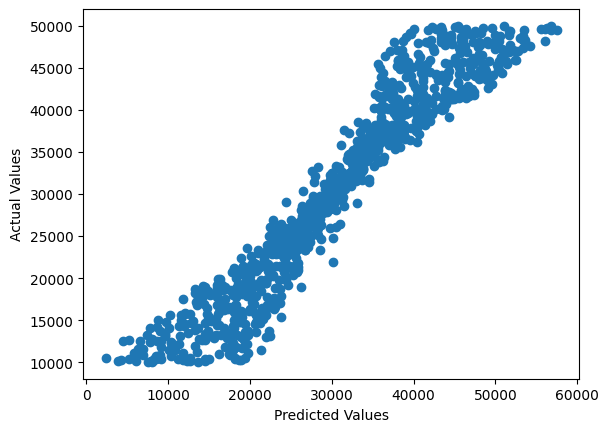

In [25]:
# Scatter plot of predicted vs actual values using the Linear Regression model
plt.scatter(lr_y_predict, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#### 5.2.2 - Support Vector Regression

In [26]:
# Split the prepared data into training, validation, and test sets.
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_prep, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(3000, 10046) (3000,) (1000, 10046) (1000,) (1000, 10046) (1000,)


In [27]:
# GridSearchCV code adapted from EECS 3401 Assignment 2

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define a dictionary of parameters to search over for the SVR.
svr_parameters = {
    'kernel': ['rbf'], 
    'C': [0.01, 0.1, 1, 10], 
    'gamma': [0.01, 1, 10]
}

# Create an SVR classifier.
svr = SVR()

# Creating a GridSearchCV object to find the best SVR model using cross-validation
svr_gs = GridSearchCV(estimator=svr, param_grid=svr_parameters, scoring='neg_root_mean_squared_error', cv=5)

# Fitting the GridSearchCV object to the training data to find the best hyperparameters
svr_gs.fit(X_train, y_train)

# Retrieving the best model found by GridSearchCV
svr_winner = svr_gs.best_estimator_

# Best model based on GridSearchCV
svr_model = SVR(kernel='rbf', C=svr_winner.C, gamma=svr_winner.gamma)

svr_model

SVR(C=10, gamma=0.01)

In [37]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

# Number of folds for cross-validation
num_folds = 5

# Performing cross-validation using cross_validate function
cv_value = cross_validate(
    estimator = svr_model,
    X = X_train, 
    y = y_train, 
    cv = num_folds, 
    scoring = 'neg_root_mean_squared_error',
    return_train_score = False
)

# Calculating the mean RMSE across the cross-validation folds
svr_train = -1 * np.mean(cv_value['test_score'])

print("Cross-Validation RMSE:", svr_train)

Cross-Validation RMSE: 11370.19172100448


In [38]:
# Fitting the SVR model to the training data
svr_model.fit(X_train,y_train)

# Predicting target values using the trained SVR model on the test set
svr_y_predict = svr_model.predict(X_test)

# Calculating the RMSE between predicted and actual target values on the test set
svr_test = {"RMSE": mean_squared_error(y_test, svr_y_predict, squared=False)}

print("Predicted-Actual RMSE:", svr_test)

Predicted-Actual RMSE: 11370.19172100448


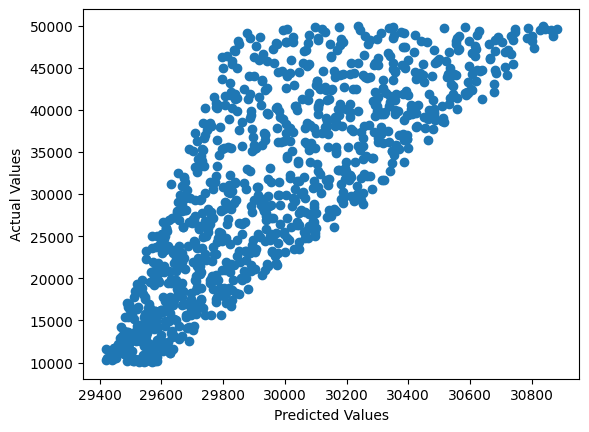

In [39]:
# Creating a scatter plot of predicted vs actual values using the SVR model
plt.scatter(svr_y_predict, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#### 5.2.3 - Random Forest Regression

In [41]:
# GridSearchCV code adapted from EECS 3401 Assignment 2

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define a dictionary of parameters to search over for the RF.
rf_parameters = {
    'n_estimators' : [10, 25, 50, 100],
    'max_depth' : [10, 20, 30, 40, 50],
    'min_samples_split' : [25, 50, 100]
}

# Create an RF classifier.
rf = RandomForestRegressor()

# Creating a GridSearchCV object to find the best RF model using cross-validation
rf_gs = GridSearchCV(estimator=rf, param_grid=rf_parameters, scoring='neg_root_mean_squared_error', cv=5)

# Fitting the GridSearchCV object to the training data to find the best hyperparameters
rf_gs.fit(X_train, y_train)

# Retrieving the best model found by GridSearchCV
rf_model = rf_gs.best_estimator_

# Best model based on GridSearchCV
rf_model = RandomForestRegressor(
    n_estimators = rf_model.n_estimators, 
    max_depth = rf_model.max_depth, 
    min_samples_split = rf_model.min_samples_split, 
    random_state = 42
)

rf_model

RandomForestRegressor(max_depth=20, min_samples_split=25, random_state=42)

In [42]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

# Number of folds for cross-validation
num_folds = 5

# Performing cross-validation using cross_validate function
cv_value = cross_validate(
    estimator = rf_model,
    X = X_train, 
    y = y_train, 
    cv = num_folds, 
    scoring = 'neg_root_mean_squared_error',
    return_train_score = False
)

# Calculating the mean RMSE across the cross-validation folds
rf_train = -1 * np.mean(cv_value['test_score'])

print("Cross-Validation RMSE:", rf_train)

Cross-Validation RMSE: 814.0625751361081


In [43]:
# Fitting the RF model to the training data
rf_model.fit(X_train,y_train)

# Predicting target values using the trained RF model on the test set
rf_y_predict = rf_model.predict(X_test)

# Calculating the RMSE between predicted and actual target values on the test set
rf_test = {"RMSE": mean_squared_error(y_test, rf_y_predict, squared=False)}

print("Predicted-Actual RMSE:", rf_test)

Predicted-Actual RMSE: {'RMSE': 751.3918568838782}


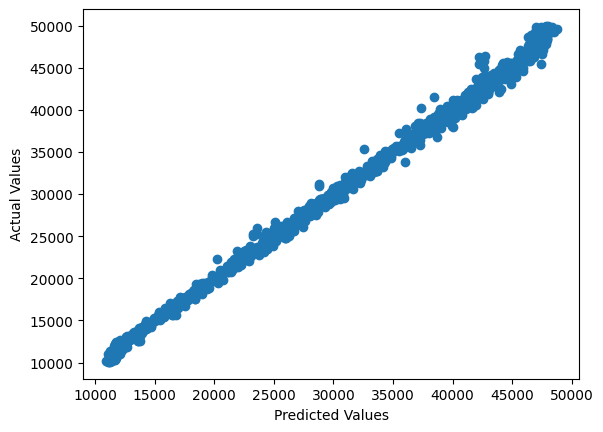

In [44]:
# Creating a scatter plot of predicted vs actual values using the RF model
plt.scatter(rf_y_predict, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

## 6 - Best Performing Algorithm.

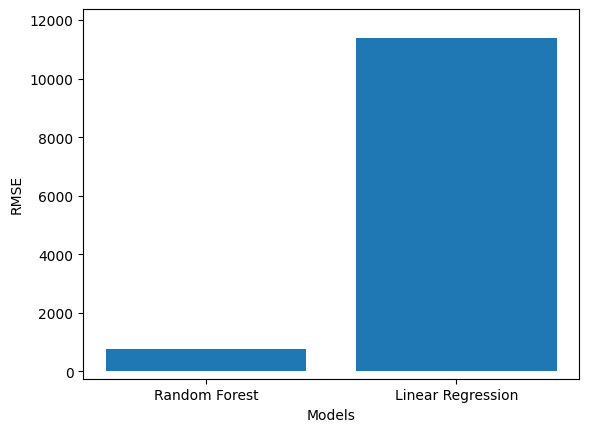

In [64]:
# Data
models = ['Random Forest', 'Linear Regression']
rmse_values = [751.39, 11370.19]  

# Creating a bar plot
plt.bar(models, rmse_values)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.ylim(min(rmse_values) - 1000, max(rmse_values) + 1000)  # Adjust ylim for better visualization
plt.show()

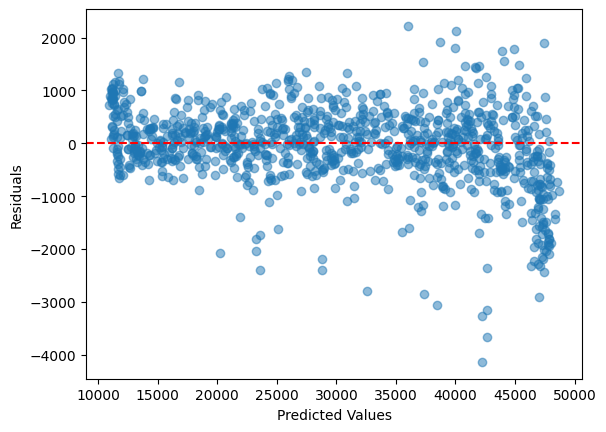

In [47]:
# Calculating residuals
residuals = rf_y_predict - y_test

# Creating a scatter plot
plt.scatter(rf_y_predict, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()